In [181]:
# Configs

embedding_type = "perf" # time or perf

In [182]:
import pandas as pd
import matplotlib
import numpy as np
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3, suppress=True)

In [201]:
dataset = pd.read_csv(f"../../dataset/{embedding_type}/dataset.csv")
dataset = pd.get_dummies(dataset)

dataset.head()

labels = [
    "label_strings",
    "label_implementation",
    "label_greedy",
    "label_brute_force",
    "label_dp",
    "label_divide_and_conquer",
    "label_graphs",
    "label_binary_search",
    "label_math",
    "label_sortings",
    "label_shortest_paths",
]
print_labels = list(map(lambda l: (l.split('_', 1)[1].replace('_', ' ')), labels))

dataset, _ = train_test_split(dataset, test_size=0.75, random_state=42, shuffle=True)

dataset.reset_index(drop=True, inplace=True)
dataset_features = dataset.copy().drop(labels, axis=1)
dataset_labels = pd.concat([dataset.copy().pop(x) for x in labels], axis=1)

In [202]:
dataset.sort_index()

,branch-misses_FEATURE_CONFIG,branch-misses_INTERCEPT,branch-misses_R-VAL,branches_FEATURE_CONFIG,branches_INTERCEPT,branches_R-VAL,context-switches_FEATURE_CONFIG,context-switches_INTERCEPT,context-switches_R-VAL,cpu-migrations_FEATURE_CONFIG,...,stalled-cycles-frontend_FEATURE_TYPE_LOGLOG_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_LOG_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_POWER,task-clock_FEATURE_TYPE_FACTORIAL,task-clock_FEATURE_TYPE_FRACTIONAL_POWER,task-clock_FEATURE_TYPE_LOGLOG_POLYNOMIAL,task-clock_FEATURE_TYPE_LOG_POLYNOMIAL,task-clock_FEATURE_TYPE_POLYNOMIAL,task-clock_FEATURE_TYPE_POWER
0,0.5,12101.182789,1.347908e+02,1.0,353189.869796,6.991008,0,0.0,0.0,0,...,0,0,1,0,0,1,0,0,0,0
1,1.0,12541.739412,1.961730e-01,1.0,358140.784952,885.063476,0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,4060.751307,1.882670e-01,1.0,45163.125423,95.145755,0,0.0,0.0,0,...,0,1,0,0,0,1,0,0,0,0
3,2.0,12354.632653,-7.081633e+01,0.0,363260.119556,337.902862,0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,0
4,4.0,12291.204258,1.264629e-15,2.0,355420.193335,0.001178,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,0.6,12332.719967,1.306533e+02,1.0,355661.201827,0.042989,0,0.0,0.0,0,...,0,0,0,1,0,1,0,0,0,0
1483,0.9,12537.804792,-2.816805e+02,1.0,358095.356104,43.928507,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,0
1484,2.0,12400.910456,3.882239e-02,1.0,356256.013131,436.178066,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1485,0.1,12259.142873,-1.111425e+03,1.0,355157.420218,0.326510,0,0.0,0.0,0,...,0,1,0,0,0,0,0,1,0,0


In [203]:
dataset.sort_index()

,branch-misses_FEATURE_CONFIG,branch-misses_INTERCEPT,branch-misses_R-VAL,branches_FEATURE_CONFIG,branches_INTERCEPT,branches_R-VAL,context-switches_FEATURE_CONFIG,context-switches_INTERCEPT,context-switches_R-VAL,cpu-migrations_FEATURE_CONFIG,...,stalled-cycles-frontend_FEATURE_TYPE_LOGLOG_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_LOG_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_POWER,task-clock_FEATURE_TYPE_FACTORIAL,task-clock_FEATURE_TYPE_FRACTIONAL_POWER,task-clock_FEATURE_TYPE_LOGLOG_POLYNOMIAL,task-clock_FEATURE_TYPE_LOG_POLYNOMIAL,task-clock_FEATURE_TYPE_POLYNOMIAL,task-clock_FEATURE_TYPE_POWER
0,0.5,12101.182789,1.347908e+02,1.0,353189.869796,6.991008,0,0.0,0.0,0,...,0,0,1,0,0,1,0,0,0,0
1,1.0,12541.739412,1.961730e-01,1.0,358140.784952,885.063476,0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,4060.751307,1.882670e-01,1.0,45163.125423,95.145755,0,0.0,0.0,0,...,0,1,0,0,0,1,0,0,0,0
3,2.0,12354.632653,-7.081633e+01,0.0,363260.119556,337.902862,0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,0
4,4.0,12291.204258,1.264629e-15,2.0,355420.193335,0.001178,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,0.6,12332.719967,1.306533e+02,1.0,355661.201827,0.042989,0,0.0,0.0,0,...,0,0,0,1,0,1,0,0,0,0
1483,0.9,12537.804792,-2.816805e+02,1.0,358095.356104,43.928507,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,0
1484,2.0,12400.910456,3.882239e-02,1.0,356256.013131,436.178066,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1485,0.1,12259.142873,-1.111425e+03,1.0,355157.420218,0.326510,0,0.0,0.0,0,...,0,1,0,0,0,0,0,1,0,0


In [204]:
ss = []
ss_dict = {}
max_dict = 0

for i in range(len(dataset)):
    s = ""
    for l in labels:
        if dataset[l][i] > 0:
            s = s + l[6:] + " "
    if "strings" in s and "brute_force" in s:
        s = "strings & brute_force"
    elif "strings" in s:
        s = "strings"
    elif "brute_force" in s:
        s = "brute_force"
    else:
        s = "other"
    if ss_dict.get(s, None) != None:
        ss.append(ss_dict[s])
    else:
        ss.append(max_dict)
        ss_dict[s] = max_dict
        max_dict = max_dict + 1
    
d = np.array(ss)

In [205]:
print(ss_dict) 
print(d)
print(max_dict)

{'strings': 0, 'other': 1, 'brute_force': 2, 'strings & brute_force': 3}
[0 1 1 ... 1 1 1]
4


In [206]:
X = dataset_features
y = d
target_names = list(ss_dict.keys())

print(target_names)

['strings', 'other', 'brute_force', 'strings & brute_force']


r 0 strings
y 1 other
b 2 brute_force
g 3 strings & brute_force


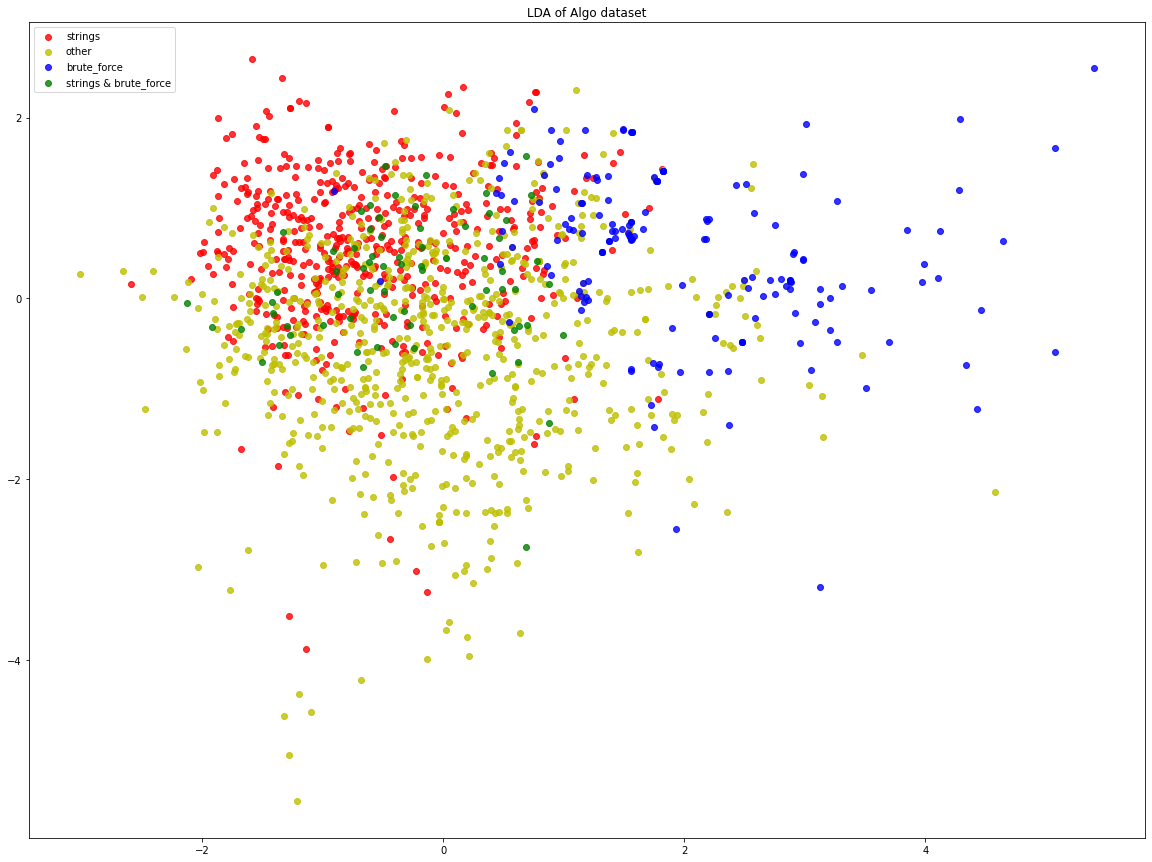

In [208]:
#From https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

colors = ['r', 'y', 'b', 'g']

plt.figure(figsize=(20, 15))
for color, i, target_name in zip(colors, range(4), target_names):
    print(color, i, target_name)
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(labels=target_names, loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of Algo dataset")

plt.show()